<a href="https://colab.research.google.com/github/Dexter0013/Operations-on-Databases/blob/main/csv_to_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir /content/drive/My\ Drive/data

In [ ]:
!pip install streamlit -q

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
[[('n03902125', 'pay-phone', np.float32(0.51265055)), ('n04335435', 'streetcar', np.float32(0.07836408)), ('n06794110', 'street_sign', np.float32(0.06160751)), ('n02747177', 'ashcan', np.float32(0.0288719)), ('n03891251', 'park_bench', np.float32(0.019393392))]]
Prediction results appended to data/prediction_results.csv


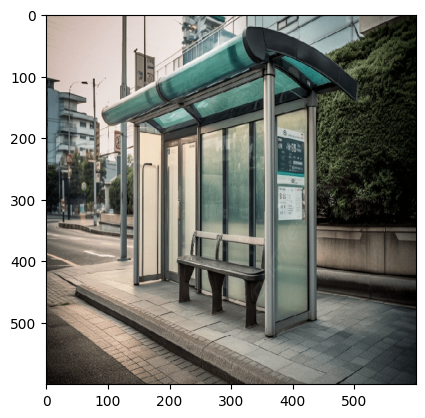

In [16]:
f='/content/drive/MyDrive/data/bus stop.jpg'
import datetime
import os
import matplotlib.pyplot as plt
import csv
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

model = EfficientNetB7(weights='imagenet')
img = image.load_img(f, target_size=(600, 600))  # EfficientNetB7 expects 600x600
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array)
results = decode_predictions(predictions)
plt.imshow(img)
print(results)

def append_prediction_to_csv(filename, prediction_results):
    # Check if the directory exists, create if not
    if not os.path.exists('/content/drive/MyDrive/data'):
        os.makedirs('data')

    # Define the full path to the CSV file within the 'data' directory
    csv_filepath = os.path.join('/content/drive/MyDrive/data', filename)

    # Define the header if the file is new
    header = ['ImageNet ID', 'Label', 'Score', 'date', 'time']

    # Check if the file exists to decide if we need to write the header
    file_exists = os.path.exists(csv_filepath)

    with open(csv_filepath, mode='a', newline='') as file:
        writer = csv.writer(file)

        # Write the header only if the file did not exist before
        if not file_exists:
            writer.writerow(header)

        # Get the current date and time
        now = datetime.datetime.now()
        current_date = now.strftime("%Y-%m-%d")
        current_time = now.strftime("%H:%M:%S")

        # Write each prediction result
        if prediction_results and prediction_results[0] and prediction_results[0][0]:
            # Extract the first prediction (ImageNet ID, Label, Score)
            first_prediction_row = prediction_results[0][0]
            # Ensure the data is a list of the three elements
            writer.writerow([first_prediction_row[0], first_prediction_row[1], first_prediction_row[2], current_date, current_time])


append_prediction_to_csv('prediction_results.csv', results)

print(f"Prediction results appended to data/prediction_results.csv")

In [21]:
import pandas as pd
res=pd.read_csv('/content/drive/MyDrive/data/prediction_results.csv')
res

,ImageNet ID,Label,Score,date,time
0,n04146614,school_bus,0.826016,2025-07-05,15:37:07
1,n02113023,Pembroke,0.889250,2025-07-05,15:37:55
2,n04485082,tripod,0.089632,2025-07-05,15:38:50
3,n02930766,cab,0.391193,2025-07-05,15:39:55
4,n04456115,torch,0.356086,2025-07-05,15:40:35
5,n03595614,jersey,0.223669,2025-07-05,15:42:20
6,n02666196,abacus,0.877780,2025-07-05,15:43:14
7,n03902125,pay-phone,0.512651,2025-07-05,15:44:34


from matplotlib import pyplot as plt
res['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
res.groupby('ImageNet ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
res.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
res.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ImageNet ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='ImageNet ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Label')):
  _plot_series(series, series_name, i)
  fig.legend(title='Label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ImageNet ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='ImageNet ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
res['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Label'].value_counts()
    for x_label, grp in res.groupby('ImageNet ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ImageNet ID')
_ = plt.ylabel('Label')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time'].value_counts()
    for x_label, grp in res.groupby('Label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Label')
_ = plt.ylabel('time')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(res['ImageNet ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(res, x='Score', y='ImageNet ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(res['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(res, x='Score', y='Label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(res['time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(res, x='Score', y='time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

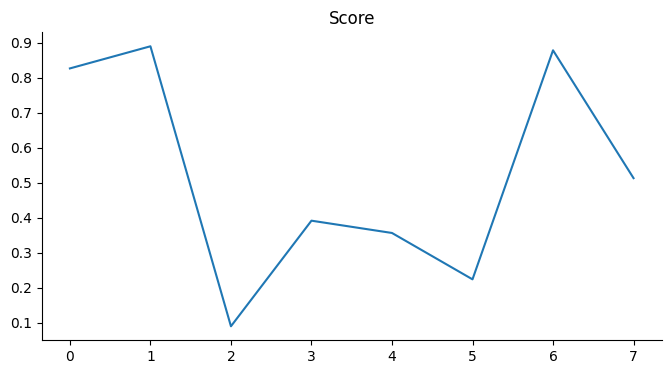

In [22]:
from matplotlib import pyplot as plt
res['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

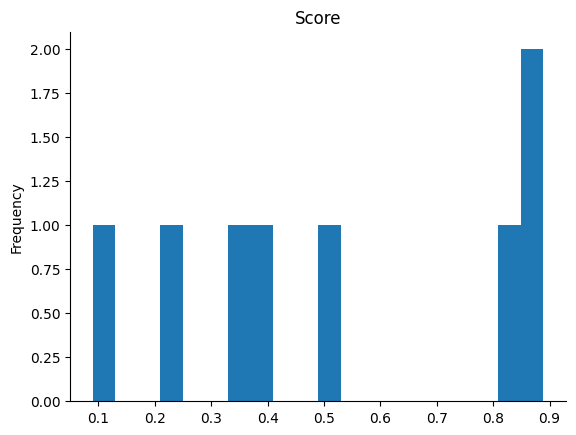

In [20]:
from matplotlib import pyplot as plt
res['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: along with prediction need to add date and time

import datetime

def append_prediction_to_csv(filename, prediction_results):
    # Check if the directory exists, create if not
    if not os.path.exists('data'):
        os.makedirs('data')

    # Define the full path to the CSV file within the 'data' directory
    csv_filepath = os.path.join('data', filename)

    # Define the header if the file is new, now including Date and Time
    header = ['ImageNet ID', 'Label', 'Score', 'Date', 'Time']

    # Check if the file exists to decide if we need to write the header
    file_exists = os.path.exists(csv_filepath)

    with open(csv_filepath, mode='a', newline='') as file:
        writer = csv.writer(file)

        # Write the header only if the file did not exist before
        if not file_exists:
            writer.writerow(header)

        # Get the current date and time
        now = datetime.datetime.now()
        current_date = now.strftime("%Y-%m-%d")
        current_time = now.strftime("%H:%M:%S")

        # Write each prediction result
        if prediction_results and prediction_results[0] and prediction_results[0][0]:
            # Extract the first prediction (ImageNet ID, Label, Score)
            first_prediction_row = prediction_results[0][0]
            # Ensure the data is a list of the three elements and append date/time
            writer.writerow([first_prediction_row[0], first_prediction_row[1], first_prediction_row[2], current_date, current_time])

In [ ]:
# prompt: create an csv file that stores results after every prediction only the first prediction

# Function to append prediction results to a CSV file
def append_first_prediction_to_csv(filename, prediction_results):
    """
    Appends only the first prediction result to a CSV file.

    Args:
        filename (str): The path to the CSV file.
        prediction_results (list): A list of tuples, where each tuple
                                   is a single prediction result in the format
                                   (imagenet_id, label, score).
    """
    # Check if the directory exists, create if not
    if not os.path.exists('data'):
        os.makedirs('data')

    # Define the full path to the CSV file within the 'data' directory
    csv_filepath = os.path.join('data', filename)

    # Define the header if the file is new
    header = ['ImageNet ID', 'Label', 'Score']

    # Check if the file exists to decide if we need to write the header
    file_exists = os.path.exists(csv_filepath)

    with open(csv_filepath, mode='a', newline='') as file:
        writer = csv.writer(file)

        # Write the header only if the file did not exist before
        if not file_exists:
            writer.writerow(header)

        # Write only the first prediction result if prediction_results is not empty
        if prediction_results and prediction_results[0] and prediction_results[0][0]:
            # Extract the first prediction (ImageNet ID, Label, Score)
            first_prediction_row = prediction_results[0][0]
            # Ensure the data is a list of the three elements
            writer.writerow([first_prediction_row[0], first_prediction_row[1], first_prediction_row[2]])
        else:
             print("No prediction results to write.")

# Example usage after making a prediction:
# Assuming 'results' contains the output of decode_predictions
# and you want to append the first prediction from the first image's results
append_first_prediction_to_csv('first_prediction_results.csv', results)

print(f"Only the first prediction result appended to data/first_prediction_results.csv")

Only the first prediction result appended to data/first_prediction_results.csv


In [ ]:
import pandas as pd
# res=pd.DataFrame(results)
# res.head()
print(results)
label=results[0][0][1]
predi=results[0][0][2].item()*100
res_df=pd.DataFrame([[label,predi]], columns=['labels','predi'])
res_df
while True:
             # results = model.predict(frame)
              if results and results[0]:
                  label = results[0][0][1]
                  predi = results[0][0][2].item() * 100

                  # Create a new row DataFrame
                  new_row = pd.DataFrame([[label, predi]], columns=['labels', 'predi'])

                  # Concatenate the new row to the main results_df
                  results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

NameError: name 'results' is not defined

Directory 'data' created and 'test_file.txt' inserted.
Upload an image file (or press Cancel to stop):


Saving chess.webp to chess.webp
User uploaded file "chess.webp" with length 19076 bytes


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


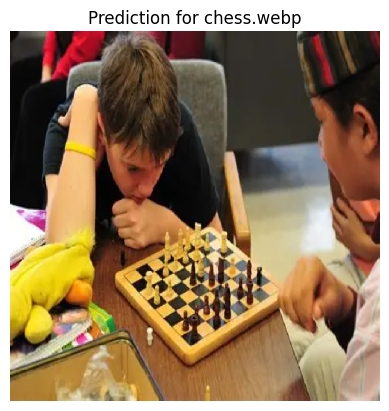

Prediction results for chess.webp:
[[('n02666196', 'abacus', np.float32(0.8777801)), ('n03089624', 'confectionery', np.float32(0.010284676)), ('n06785654', 'crossword_puzzle', np.float32(0.0055394876)), ('n03530642', 'honeycomb', np.float32(0.004719036)), ('n02948072', 'candle', np.float32(0.004456472))]]

Updated Results DataFrame:
   labels      predi
0  abacus  87.778008
Upload an image file (or press Cancel to stop):


/tmp/ipython-input-72-2406440667.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


KeyboardInterrupt: 

In [ ]:
# prompt: edit it such that after every prediction the new data gets saved in the dataframe and loops

import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import pandas as pd
from google.colab import files
!pip install streamlit -q


if not os.path.exists('data'):
    os.makedirs('data')

# Example of creating and writing to a file inside the 'data' directory
file_content = "This is a test file."
with open('data/test_file.txt', 'w') as f:
    f.write(file_content)

print("Directory 'data' created and 'test_file.txt' inserted.")

# Initialize or load the DataFrame to store results
results_df = pd.DataFrame(columns=['labels', 'predi'])

model = EfficientNetB7(weights='imagenet')

while True:
    print("Upload an image file (or press Cancel to stop):")
    uploaded = files.upload()

    if not uploaded:
        print("No files uploaded. Stopping the loop.")
        break

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

        # Save the uploaded file to the data directory
        file_path = os.path.join('data', fn)
        with open(file_path, 'wb') as f:
            f.write(uploaded[fn])

        try:
            img = image.load_img(file_path, target_size=(600, 600))  # EfficientNetB7 expects 600x600
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            predictions = model.predict(img_array)
            results = decode_predictions(predictions)

            plt.imshow(img)
            plt.title(f"Prediction for {fn}")
            plt.axis('off')
            plt.show()

            print(f"Prediction results for {fn}:")
            print(results)

            if results and results[0]:
                label = results[0][0][1]
                predi = results[0][0][2].item() * 100

                # Create a new row DataFrame
                new_row = pd.DataFrame([[label, predi]], columns=['labels', 'predi'])

                # Concatenate the new row to the main results_df
                results_df = pd.concat([results_df, new_row], ignore_index=True)

                print("\nUpdated Results DataFrame:")
                print(results_df)
            else:
                print(f"Could not decode predictions for {fn}.")

        except Exception as e:
            print(f"An error occurred while processing {fn}: {e}")

print("\nFinal Results DataFrame:")
results_df


In [ ]:
# prompt: want to create a dataframe where it stores the highest prediction and the label and load after every prediction

import pandas as pd

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Highest Prediction', 'Label'])

# Assuming 'results' from the previous cell contains predictions for one image
# Extract the highest prediction and its label
highest_prediction = results[0][0][2] # Confidence of the highest prediction
label = results[0][0][1] # Label of the highest prediction

# Create a new row to add to the DataFrame
new_row = pd.DataFrame([[highest_prediction, label]], columns=['Highest Prediction', 'Label'])

# Concatenate the new row to the existing DataFrame
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the updated DataFrame
print(results_df)

# You would repeat this process after each prediction
# For demonstration, let's add a dummy second prediction
# Replace this with actual predictions for another image
dummy_results = [[('n03773504', 'minibus', 0.85), ('n03935770', 'piggy_bank', 0.05)]]
dummy_highest_prediction = dummy_results[0][0][2]
dummy_label = dummy_results[0][0][1]
dummy_new_row = pd.DataFrame([[dummy_highest_prediction, dummy_label]], columns=['Highest Prediction', 'Label'])
results_df = pd.concat([results_df, dummy_new_row], ignore_index=True)

# Display the DataFrame after adding the dummy prediction
results_df

   Highest Prediction       Label
0            0.826016  school_bus


,Highest Prediction,Label
0,0.826016,school_bus
1,0.850000,minibus


In [ ]:
import pandas as pd
res=pd.DataFrame(results)
res.head()

,0,1,2,3,4
0,"(n04146614, school_bus, 0.826016)","(n02123159, tiger_cat, 0.0010568623)","(n02326432, hare, 0.00077600166)","(n06874185, traffic_light, 0.0006831641)","(n04487081, trolleybus, 0.00060583313)"


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.142.239.35


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.239.35:8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://quick-toys-tickle.loca.lt
  Stopping...
^C


In [ ]:
%%writefile app.py
import streamlit as st
st.title("Demo")


Overwriting app.py
